---
## Практична робота №8.Жадібні алгоритми. Наближене розв’язання екстремальних задач
## Зробив: Дзюба Данiiл
---

# Мета : набути практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.

# 1 . Розв’язати задачу комівояжера для графа, заданого варіантом, використовуючи код, наведений вище.

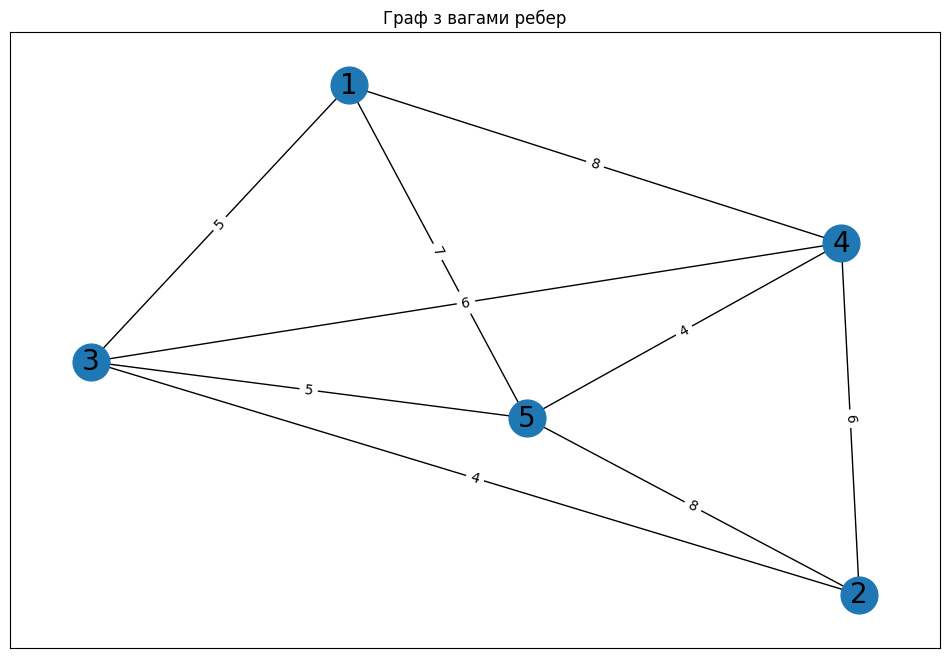


--- Відстані між вузлами ---
Відстань між 1 і 2: Немає прямого ребра
Відстань між 1 і 3: 5
Відстань між 1 і 4: 8
Відстань між 1 і 5: 7
Відстань між 2 і 3: 4
Відстань між 2 і 4: 6
Відстань між 2 і 5: 8
Відстань між 3 і 4: 6
Відстань між 3 і 5: 5
Відстань між 4 і 5: 4
---------------------------

Оптимальний маршрут: [1, 3, 2, 4, 5, 1]. Його вартість = 26


In [73]:
from itertools import permutations
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import show 

INFINITY = float('inf') 

G = None 

def get_path_length(path):
    path_length = 0
    for i, v1 in enumerate(path):
        v2 = path[(i + 1) % len(path)]
        if not G.has_edge(v1, v2):
            return INFINITY
        path_length += G[v1][v2]["weight"]
    return path_length

def node_permutations(graph_obj, init_node_index):
    all_nodes_list = list(graph_obj.nodes()) 
    
    if not (0 <= init_node_index < len(all_nodes_list)):
        raise IndexError(f"Індекс початкової вершини {init_node_index} виходить за межі діапазону (0-{len(all_nodes_list)-1}).")
        
    init_node_id = all_nodes_list[init_node_index] 

    remaining_nodes = [node for node in all_nodes_list if node != init_node_id]

    return [[init_node_id] + list(p) for p in permutations(remaining_nodes)]

def TSP_BruteForce(graph_obj, init_node_index):
    min_path = None
    min_path_length = INFINITY
    
    if len(graph_obj.nodes()) < 2:
        return None, "Для туру потрібно щонайменше 2 вершини."

    for path in node_permutations(graph_obj, init_node_index):
        path_length = get_path_length(path) 
        if path_length < min_path_length:
            min_path, min_path_length = path, path_length
            
    if min_path_length == INFINITY:
        return None, "Не знайдено дійсного шляху (граф може бути роз'єднаним або не мати ребер)."
        
    return min_path, min_path_length

def print_distances_between_nodes(graph_obj):
    print("\n--- Відстані між вузлами ---")
    nodes = list(graph_obj.nodes()) 
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)): 
            node1 = nodes[i]
            node2 = nodes[j]
            if graph_obj.has_edge(node1, node2):
                weight = graph_obj[node1][node2]["weight"]
                print(f"Відстань між {node1} і {node2}: {weight}")
            else:
                print(f"Відстань між {node1} і {node2}: Немає прямого ребра")
    print("---------------------------\n")


if __name__ == '__main__': 
    %matplotlib inline
   
    plt.figure(figsize=(12, 8)) 

    G = nx.Graph() 
    G.add_nodes_from(range(1, 6)) 
    G.add_weighted_edges_from([(1,3,5), (1,4,8), (1,5,7), (2,3,4), (2,4,6), (2,5,8), 
    (3,4,6), (3,5,5), (4,5,4)]
    )

    pos = nx.spring_layout(G) 

    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    edges = [(u, v) for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, edgelist=edges)

    edge_labels = dict([((u, v,), d['weight'])
    for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Граф з вагами ребер") 
    show() 

    print_distances_between_nodes(G) 

    start_node_index = 0 

    shortest_path_result, shortest_path_cost = TSP_BruteForce(G, start_node_index)

    if shortest_path_result:
        full_path_display = shortest_path_result + [shortest_path_result[0]]
        print("Оптимальний маршрут: {0}. Його вартість = {1}".format(full_path_display, shortest_path_cost))
    else:
        print(f"Помилка при пошуку маршруту: {shortest_path_cost}")

# 2 . Обґрунтувати асимптотику для обох алгоритмів.

1 . Груба сила - ми проходимо кожну з вершин n , іншими словами ми проходимо n*(n-1)*(n-2)... і так далі вершини і тут ми вже можемо побачити факторіал отже асимптотична складність нашого алгоритму буде O(n!).
2 . Найближчий сусід - спочатку вибираємо вершину , після цього ми n-1 раз шукаємо найближчу вершину яку ми ще не відвідували та додаємо відвідану вершину до масиву відвіданих отже асимптотична складність була б O(n^2) , але так як ми використовуємо даних, яка дозволяє швидко знаходити найближчий елемент і це буде O(log n( , отже повна асимптотична складнсть буде O(n^2 * log n). 

# 3 . Контрольні питання.

* Що таке жадібний алгоритм? - це евристичний метод для знаходження наближеного розв’язку екстремальних задач.

* Які головні принципи роботи жадібних алгоритмів? - Він послідовно робить локально оптимальні вибори, сподіваючись, що вони приведуть до глобально оптимального розв’язку. 
  
* Яка головна відмінність між жадібними алгоритмами та динамічним програмуванням? - Динамічне програмування розв'язує складну задачу, розбиваючи її на простіші підзадачі та запамятовує , а жадібний алгоритм робить локально оптимальні вибори не переглядаючи попередні рішення.

* Наведіть приклади задач, які можна розв’язати за допомогою жадібних алгоритмів - задача про рюкзак, задача про найкоротший шлях на графі та задача про мінімальне покриття, суть якої полягає в знаходженні мінімального числа множин, які покривають усі елементи заданої множини.

* Які можуть бути обмеження у використанні жадібних алгоритмів для розв'язання екстремальних задач? - основним обмеженням є те , що глобальний оптимальний розвязок не гарантований та непридатність для задач з від'ємними вагами/витратами.

* Чому жадібні алгоритми часто використовуються для наближеного розв’язання екстремальних задач? - тому що вони швидкі(іноді можуть бути і досить повільними , але зазвичай швидкі) , прості для розуміння та реалізації , та дуже добре піходять для наближеного розвязання екстремальних задач.

# 4 . Висновки

На практичному занятті ми набули практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.